## Heart Attack Analysis & Prediction Dataset
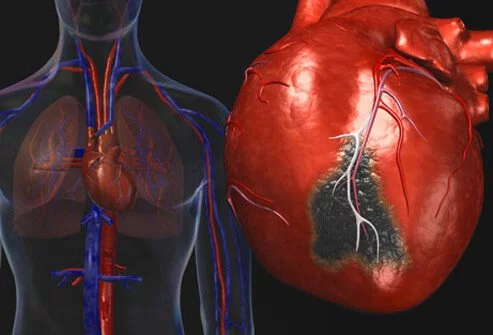

###### Dataset information:

- The data was collected to train a model to distinguish between people less likely to have heart attacks and people more likely to have heart attacks, so the whole problem is a binary classification.

The dataset can be found on the `` Kaggle`` platform at the link below:

https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

## 1. Imports from libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, precision_score, f1_score, roc_auc_score, roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import keras
from keras.models import Sequential
from keras.layers import Dense

## 2. Starting...

In [ ]:
df = pd.read_csv("../input/heart-attack-analysis-prediction-dataset/heart.csv")

In [ ]:
df = df.sample(frac = 1, random_state = 56).reset_index(drop = True)

display(df.head(3))

df.shape

We have 303 rows and 14 columns present in the dataset provided, 13 of which are characteristic variables (input data) and one of them is a target variable (which we want our model to be able to predict).

The characteristic variables are:

    age - Age of the patient
    sex - Sex of the patient
    cp - Chest Pain type chest pain type
    trtbps - resting blood pressure (in mm Hg)
    chol - cholestoral in mg/dl fetched via BMI sensor
    fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    rest_ecg  resting electrocardiographic results
    thalach - maximum heart rate achieved
    exang - exercise induced angina (1 = yes; 0 = no)
    oldpeak - Previous peak
    slp - Slope
    caa -  number of major vessels (0-3)
    thall - Thal rate

The target variable is:

     output - a *binary* type that indicates the user's less or more chance of heart attack:
             0= less chance of heart attack 
             1= more chance of heart attack

###### Finding Missing Data (NaN)
Our dataset does not have missing values as it says on the Kaggle, but just in case:

In [ ]:
df.isnull().sum()

As expected, we have no missing values :D

In [ ]:
df.info()

The ``describe()`` function generates a lot of information about numeric variables that can also be useful:

In [ ]:
df.describe().T

In [ ]:
df.hist(bins = 30, figsize = (18, 25));

We can see that in the charts we have different types of columns, being categorical and numerical:

Categorical columns: sex, exng, caa, cp, fbs, restecg, slp and thall.

Numeric columns: age, trtbps, chol, thalachh and oldpeak.

###### Defining the features of our model
For this, we will create the variable X that will receive the characteristic variables of our model, and the variable y that will receive the target variable of our model.

In [ ]:
features_num = ["age", "trtbps","chol","thalachh","oldpeak"]

features_cat = ['sex','exng','caa','cp','fbs','restecg','slp','thall']

scaler = StandardScaler()
ohe = OneHotEncoder(sparse = False)

scaled_columns = scaler.fit_transform(df[features_num]) 
encoded_columns = ohe.fit_transform(df[features_cat])

X = np.concatenate([scaled_columns, encoded_columns], axis = 1)
y = df['output']

## 3. Dividing into training and testing sets
Now we need to convert our data into training and testing sets. We will use 75% as our training data and test our model on the remaining 25% with Scikit-learn's train_test_split function.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 4)

## 4. Creation of models

###### 1. Naive Bayes
The Naive Bayes algorithm is a simple classification algorithm that uses historical data to predict the classification of new data. It works by calculating the probability of an event occurring given that another event has already occurred.

In [ ]:
nb = GaussianNB()

In [ ]:
nb.fit(X_train, y_train)

y_pred_nb = nb.predict(X_test)

In [ ]:
y_pred_nb = nb.predict(X_test)

accuracy_nb = accuracy_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)
roc_nb = roc_auc_score(y_test, y_pred_nb)

In [ ]:
print(classification_report(y_test, y_pred_nb))

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred_nb),annot = True, fmt = 'd')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")

plt.show()

###### 2. Decision Tree
The Decision Tree algorithm are statistical models that use supervised training for data classification and prediction. These models use the divide-and-conquer strategy: a complex problem is decomposed into simpler sub-problems and recursively this technique is applied to each sub. -problem

In [ ]:
dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

In [ ]:
dt.fit(X_train, y_train)

In [ ]:
y_pred_dt = dt.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
roc_dt = roc_auc_score(y_test, y_pred_dt)

In [ ]:
print(classification_report(y_test, y_pred_dt))

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred_dt),annot = True, fmt = 'd')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")

plt.show()

###### 3. Random Forest
The Random Forest algorithm creates a forest in a random way, creating several decision trees and combining them, each tree tries to estimate a ranking and this is called as “vote”, thus to obtain a more accurate and more stable prediction.

In [ ]:
rf = RandomForestClassifier(n_estimators = 250, criterion= 'entropy', random_state = 0)

In [ ]:
rf.fit(X_train, y_train)

In [ ]:
y_pred_rf = rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_rf = roc_auc_score(y_test, y_pred_rf)

In [ ]:
print(classification_report(y_test, y_pred_rf))

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred_rf),annot = True, fmt = 'd')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")

plt.show()

###### 4. kNN
The KNN or k-nearest neighbor algorithm is a very simple machine learning algorithm. It uses some sort of similarity measure to tell which class the new data falls into, in which case we'll use 5 nearest neighbors.

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 5)

In [ ]:
knn.fit(X_train, y_train)

In [ ]:
y_pred_knn = knn.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
roc_knn = roc_auc_score(y_test, y_pred_knn)

In [ ]:
print(classification_report(y_test, y_pred_knn))

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred_dt),annot = True, fmt = 'd')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")

plt.show()

###### 5. Logistic Regression
Logistic regression algorithm is used where a discrete output is expected, (eg Predict whether a user is a good or bad payer). Typically, logistic regression uses some function to squeeze values into a given range.

In [ ]:
rl = LogisticRegression(solver = 'liblinear', max_iter = 250, random_state = 0)

In [ ]:
rl.fit(X_train, y_train)

In [ ]:
y_pred_rl = rl.predict(X_test)

accuracy_rl = accuracy_score(y_test, y_pred_rl)
recall_rl = recall_score(y_test, y_pred_rl)
precision_rl = precision_score(y_test, y_pred_rl)
f1_rl = f1_score(y_test, y_pred_rl)
roc_rl = roc_auc_score(y_test, y_pred_rl)

In [ ]:
print(classification_report(y_test, y_pred_rl))

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred_rl),annot = True, fmt = 'd')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")

plt.show()

###### 6. SVM (Support Vector Machines)
The SVM algorithm separates data points using a line. This line is chosen in such a way that it will be the most important of the closest data points in 2 categories.

In [ ]:
svm = SVC(kernel = 'rbf', degree = 3, gamma = 'auto', random_state = 0)

In [ ]:
svm.fit(X_train, y_train)

In [ ]:
y_pred_svm = svm.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
roc_svm = roc_auc_score(y_test, y_pred_svm)

In [ ]:
print(classification_report(y_test, y_pred_svm))

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred_svm),annot = True, fmt = 'd')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")

plt.show()

###### 7. Neural networks
The purpose of the Neural Networks algorithm is to imitate the nervous system of humans in the learning process, it is inspired by biological neural networks

In [ ]:
rn = MLPClassifier(verbose = True, max_iter= 350, tol = 0.00010)

In [ ]:
rn.fit(X_train, y_train)

In [ ]:
y_pred_rn = rn.predict(X_test)

accuracy_rn = accuracy_score(y_test, y_pred_rn)
recall_rn = recall_score(y_test, y_pred_rn)
precision_rn = precision_score(y_test, y_pred_rn)
f1_rn = f1_score(y_test, y_pred_rn)
roc_rn = roc_auc_score(y_test, y_pred_rn)

In [ ]:
print(classification_report(y_test, y_pred_rn))

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred_rn),annot = True, fmt = 'd')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")

plt.show()

## 5. Viewing the results of all models

In [ ]:
models = [('Naive Bayes', accuracy_nb, recall_nb, precision_nb, f1_nb, roc_nb),
          ('Decision Tree', accuracy_dt, recall_dt, precision_dt, f1_dt, roc_dt),
          ('Random Forest', accuracy_rf, recall_rf, precision_rf, f1_rf, roc_rf),
          ('kNN', accuracy_knn, recall_knn, precision_knn, f1_knn, roc_knn),
          ('Logistic Regression', accuracy_rl, recall_rl, precision_rl, f1_rl, roc_rl),
          ('SVM', accuracy_svm, recall_svm, precision_svm, f1_svm, roc_svm),
          ('Neural Networks', accuracy_rn, recall_rn, precision_rn, f1_rn, roc_rn)]

df_all_models = pd.DataFrame(models, columns = ['Model', 'Accuracy (%)', 'Recall (%)', 'Precision (%)', 'F1 (%)', 'AUC'])

df_all_models

In [ ]:
plt.style.use("dark_background")

plt.subplots(figsize=(12, 10))
sns.barplot(y = df_all_models['Model'], x = df_all_models['Accuracy (%)'], palette = 'icefire')
plt.xlabel("Models")
plt.title('Accuracy')
plt.show()

In [ ]:
r_probs = [0 for _ in range(len(y_test))]
r_auc = roc_auc_score(y_test, r_probs)
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)

fpr_nb, tpr_nb, _ = roc_curve(y_test, y_pred_nb)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_knn)
fpr_rl, tpr_rl, _ = roc_curve(y_test, y_pred_rl)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_svm)
fpr_rn, tpr_rn, _ = roc_curve(y_test, y_pred_rn)

In [ ]:
sns.set_style('darkgrid')

plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)

plt.plot(fpr_nb, tpr_nb, marker='.', label='Naive Bayes (AUROC = %0.3f)' % roc_nb)
plt.plot(fpr_dt, tpr_dt, marker='.', label='Decision Tree (AUROC = %0.3f)' % roc_dt)
plt.plot(fpr_rf, tpr_rf, marker='.', label='Random Forest (AUROC = %0.3f)' % roc_rf)
plt.plot(fpr_knn, tpr_knn, marker='.', label='kNN (AUROC = %0.3f)' % roc_knn)
plt.plot(fpr_rl, tpr_rl, marker='.', label='Logistic Regression (AUROC = %0.3f)' % roc_rl)
plt.plot(fpr_svm, tpr_svm, marker='.', label='SVM (AUROC = %0.3f)' % roc_svm)
plt.plot(fpr_rn, tpr_rn, marker='.', label='Neural Networks (AUROC = %0.3f)' % roc_rn)

plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend() 
plt.show()